**<h1>Hotel Analysis</h1>**

In this analysis, I began with an uneven and unstructured dataset containing various details about hotels. The data required significant preprocessing and transformation to make it suitable for analysis. I utilized PySpark, a powerful tool for handling large datasets, to efficiently manage and transform the data.

**<h3>Data Loading and Transformation</h3>**

**Loading Data:** The raw dataset, which had inconsistencies such as missing values, incorrect data entries, and inconsistent capitalization, was loaded into a PySpark DataFrame. PySpark's distributed computing capabilities allowed for handling this large and uneven dataset effectively.

In [23]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession

In [24]:
spark= SparkSession.builder.appName('Python').getOrCreate()
spark

In [62]:
df_pyspark= spark.read.csv('Old_data.csv',header=True,inferSchema=True)
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [63]:
df_pyspark.printSchema()

root
 |-- address: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- hotel_star_rating: string (nullable = true)
 |-- per_day_price: integer (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- pageurl: string (nullable = true)
 |-- property_id: integer (nullable = true)
 |-- property_name: string (nullable = true)
 |-- room_type: string (nullable = true)
 |-- uniq_id: string (nullable = true)



In [64]:
df_pyspark.columns

['address',
 'city',
 'state',
 'country',
 'hotel_star_rating',
 'per_day_price',
 'latitude',
 'longitude',
 'pageurl',
 'property_id',
 'property_name',
 'room_type',
 'uniq_id']

In [65]:
df_pyspark.show()

+--------------------+-----------+--------------+-------+-----------------+-------------+-----------+-----------+--------------------+-----------+--------------------+--------------------+--------------------+
|             address|       city|         state|country|hotel_star_rating|per_day_price|   latitude|  longitude|             pageurl|property_id|       property_name|           room_type|             uniq_id|
+--------------------+-----------+--------------+-------+-----------------+-------------+-----------+-----------+--------------------+-----------+--------------------+--------------------+--------------------+
|12/2 Adichunchang...|     mysore|     Karnataka|  India|             NULL|         4019|12.29355231|76.63265347|http://www.bookin...|    1640494|        Mysore Homes|  Superior Twin Room|60c8c27580685fe1e...|
|Pimpalwadi Road ....|     shirdi|   Maharashtra|  India|          4 stars|         1299| 19.7675808| 74.4766939|http://www.bookin...|     548678|              

**<h3>Data Cleaning:</h3>**

**Removing Null Values:** I identified and removed rows with null or missing values to ensure the integrity of the analysis. This step was crucial for avoiding skewed results due to incomplete data.

**Correcting Values:** Erroneous or inconsistent data entries were corrected. For example, incorrect or inconsistent hotel ratings were standardized to a uniform format.

**Letter Correction:** To maintain consistency, the text data was cleaned by capitalizing or formatting strings correctly, ensuring uniformity across columns such as hotel names, locations, and reviews.

In [66]:
df_pyspark= df_pyspark.na.drop(how='any',subset=['hotel_star_rating'])
df_pyspark= df_pyspark.na.drop()
df_pyspark.show()

+--------------------+------------+----------------+-------+-----------------+-------------+-----------+-----------+--------------------+-----------+--------------------+--------------------+--------------------+
|             address|        city|           state|country|hotel_star_rating|per_day_price|   latitude|  longitude|             pageurl|property_id|       property_name|           room_type|             uniq_id|
+--------------------+------------+----------------+-------+-----------------+-------------+-----------+-----------+--------------------+-----------+--------------------+--------------------+--------------------+
|Pimpalwadi Road ....|      shirdi|     Maharashtra|  India|          4 stars|         1299| 19.7675808| 74.4766939|http://www.bookin...|     548678|              Sharan|Standard Triple R...|4daf50dc6b374f9e0...|
|Bakraur Village R...|   bodh gaya|           Bihar|  India|     4-star hotel|         1299|24.68030392| 84.9988389|http://www.bookin...|     570832

In [67]:
df_pyspark= df_pyspark.withColumnRenamed('hotel_star_rating','hotel_rating')
replace_dict = {"1 stars": "1-star hotel", "2 stars": "2-star hotel", "3 stars": "3-star hotel", "4 stars": "4-star hotel", "5 stars": "5-star hotel"}
df_pyspark = df_pyspark.replace(replace_dict, subset="hotel_rating")
df_pyspark.show()

+--------------------+------------+----------------+-------+------------+-------------+-----------+-----------+--------------------+-----------+--------------------+--------------------+--------------------+
|             address|        city|           state|country|hotel_rating|per_day_price|   latitude|  longitude|             pageurl|property_id|       property_name|           room_type|             uniq_id|
+--------------------+------------+----------------+-------+------------+-------------+-----------+-----------+--------------------+-----------+--------------------+--------------------+--------------------+
|Pimpalwadi Road ....|      shirdi|     Maharashtra|  India|4-star hotel|         1299| 19.7675808| 74.4766939|http://www.bookin...|     548678|              Sharan|Standard Triple R...|4daf50dc6b374f9e0...|
|Bakraur Village R...|   bodh gaya|           Bihar|  India|4-star hotel|         1299|24.68030392| 84.9988389|http://www.bookin...|     570832|Mahamaya Palace H...|   

In [68]:
from pyspark.sql.functions import initcap
df_pyspark = df_pyspark.withColumn('city', initcap('city'))
df_pyspark.select(['hotel_rating', 'city', 'property_name', 'per_day_price']).show()

+------------+------------+--------------------+-------------+
|hotel_rating|        city|       property_name|per_day_price|
+------------+------------+--------------------+-------------+
|4-star hotel|      Shirdi|              Sharan|         1299|
|4-star hotel|   Bodh Gaya|Mahamaya Palace H...|         1299|
|5-star hotel|       Thane|OYO Rooms Thane S...|         3549|
|1-star hotel|     Mandāwa|    Hotel Royal Rest|          499|
|3-star hotel|    Dehradun|     Hotel Sukhsadan|          899|
|3-star hotel|    Bhīm Tāl|      The Pine Crest|         1059|
|3-star hotel|   Rishīkesh|  Hotel Shivansh Inn|          899|
|3-star hotel|  Chandīgarh|       Hotel Classic|         1199|
|5-star hotel|    Tirupati|OYO Rooms Renigun...|         9399|
|5-star hotel|  Trivandrum|OYO Rooms Medical...|         7449|
|3-star hotel|    Vadodara|           The Oasis|         1199|
|2-star hotel|        Pune|      Treebo E Serai|          549|
|2-star hotel|Bhubaneshwar|        Hotel Seetal|       

In [69]:
df_pyspark= df_pyspark.sort(df_pyspark["per_day_price"].desc())
df_pyspark.show()

+--------------------+-----------+----------------+-------+------------+-------------+-----------+-----------+--------------------+-----------+--------------------+--------------------+--------------------+
|             address|       city|           state|country|hotel_rating|per_day_price|   latitude|  longitude|             pageurl|property_id|       property_name|           room_type|             uniq_id|
+--------------------+-----------+----------------+-------+------------+-------------+-----------+-----------+--------------------+-----------+--------------------+--------------------+--------------------+
|Next to Havmor Re...|  Ahmedabad|         Gujarat|  India|5-star hotel|         9999|23.03747893| 72.5663946|http://www.bookin...|    1837291|Treebo Super Inn ...|Standard Double Room|507fa25030cde0779...|
|R-3.Virbhadra Mar...|  Rishīkesh|     Uttarakhand|  India|5-star hotel|         9949| 30.0727556| 78.2808994|http://www.bookin...|    1829573|OYO Rooms AIIMS R...|Deluxe S

**<h3>Data Visualization,</h3>**
To visualize the cleaned and sorted data, I employed Matplotlib and Seaborn, two popular data visualization libraries in Python:

**Data Conversion:** First of all the PySpark DataFrame is converted into a Pandas DataFrame. This step enabled more straightforward analysis and visualization of the data using the extensive libraries available in Python.

In [72]:
import pandas as pd
df_pandas = df_pyspark.toPandas()
df_pandas

,address,city,state,country,hotel_rating,per_day_price,latitude,longitude,pageurl,property_id,property_name,room_type,uniq_id
0,Next to Havmor Restaurant. Off C.G Road. Navra...,Ahmedabad,Gujarat,India,5-star hotel,9999,23.037479,72.566395,http://www.booking.com/hotel/in/treebo-super-i...,1837291,Treebo Super Inn Armoise,Standard Double Room,507fa25030cde07790324866cfed9b8e
1,R-3.Virbhadra Marg. 249201 Rishīkesh. India – ...,Rishīkesh,Uttarakhand,India,5-star hotel,9949,30.072756,78.280899,http://www.booking.com/hotel/in/oyo-rooms-aiim...,1829573,OYO Rooms AIIMS Rishikesh,Deluxe Single Room with Balcony,e06af4a23ce12a70562d6d46cd5f29e4
2,Guest House .Rajbagh zero bridge. 190008 Srina...,Srinagar,Jammu & Kashmir,India,5-star hotel,9899,34.068430,74.831010,http://www.booking.com/hotel/in/oyo-rooms-near...,1829593,OYO Rooms Near Zero Bridge,Deluxe Single Room with Balcony,e1923eb22a05eebfcf5dcadf5b9e6a68
3,Near HPTDC Lift.Cart Road. 171001 Shimla. Indi...,Shimla,Himachal Pradesh,India,5-star hotel,9799,31.102910,77.174227,http://www.booking.com/hotel/in/oyo-rooms-near...,1829586,OYO Rooms Near Tourism Lift,Deluxe Single Room with Balcony,4ff1983912ac6dd39128ce442fadbdbe
4,kotwali bazar. 176215 Dharamshala. India – Sho...,Dharamshala,Himachal Pradesh,India,5-star hotel,9749,32.215784,76.319017,http://www.booking.com/hotel/in/silver-spring-...,1843600,silver spring residency,Deluxe Single Room,49b147d353f4843f27840ac945012b70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,Danika Residency. RV03-PH02. Grande Vanelim. C...,Colva,Goa,India,1-star hotel,499,15.271807,73.929936,http://www.booking.com/hotel/in/rainbow-rental...,1759239,Rainbow Rentals (Danika Residency),Deluxe Double Room with Bath,578135596fa31c6fcd46991aeca746a0
2785,200 Feet Bypass Road. Opposite Rajesh Motors(A...,Alwar,Rajasthan,India,1-star hotel,499,27.581603,76.646649,http://www.booking.com/hotel/in/maan-and-resta...,1755094,Maan Hotel And Restaurant,Budget Double Room,228b10dbfdc24d189d0d6ad7df4b8b34
2786,PIPALKOTI. 246472 Pīpalkoti. India – Show map,Pīpalkoti,Uttarakhand,India,1-star hotel,499,30.429540,79.428116,http://www.booking.com/hotel/in/trh-pipalkoti....,1741747,TRH Pipalkoti,Economy Double Room,72c0af09827bbb620365aa5df523ba1d
2787,Akshara guest house 71.gangaur ghat.near bagor...,Udaipur,Rajasthan,India,1-star hotel,499,24.579665,73.682559,http://www.booking.com/hotel/in/akshara-guest-...,1760549,Akshara guest house,Small Double Room,b579811037e2bad5cf85b16a366e7d0f


**Matplotlib:** I used Matplotlib to create basic histogram to visualize the distribution of hotel ratings and the number of hotels under that rating.

**Seaborn:** Seaborn was leveraged for more complex visualizations, such as scatterplot to uncover deeper insights into the dataset. For example, I visualized the relationship between hotel ratings with respect to latitude and longitude across different regions.

In [73]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

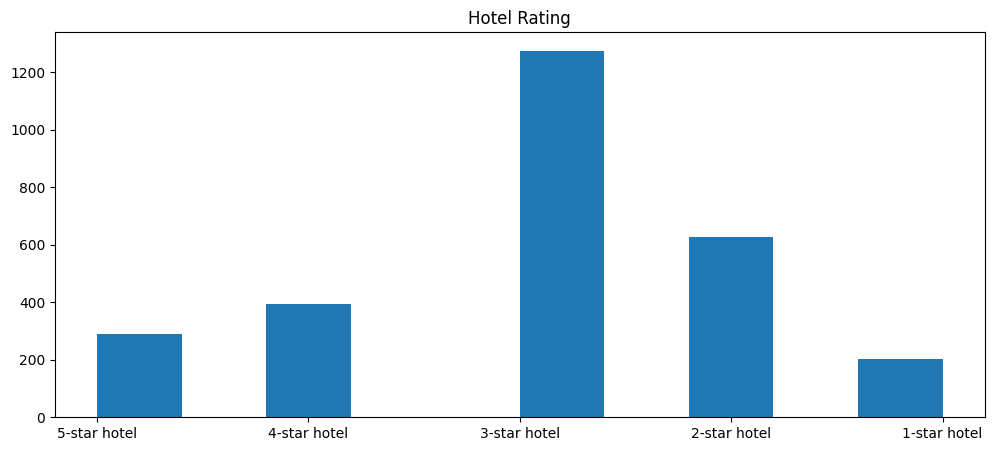

In [74]:
plt.figure(figsize=(12, 5))
plt.title("Hotel Rating")
plt.hist(df_pandas.hotel_rating);

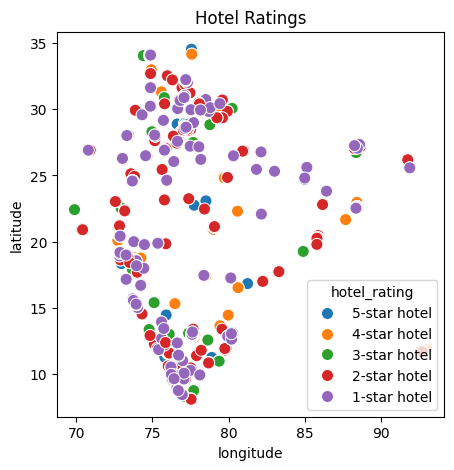

In [75]:
plt.figure(figsize=(5, 5))
plt.title('Hotel Ratings')
sns.scatterplot(x=df_pandas.longitude, 
                y=df_pandas.latitude, 
                hue=df_pandas.hotel_rating,
                s=75);

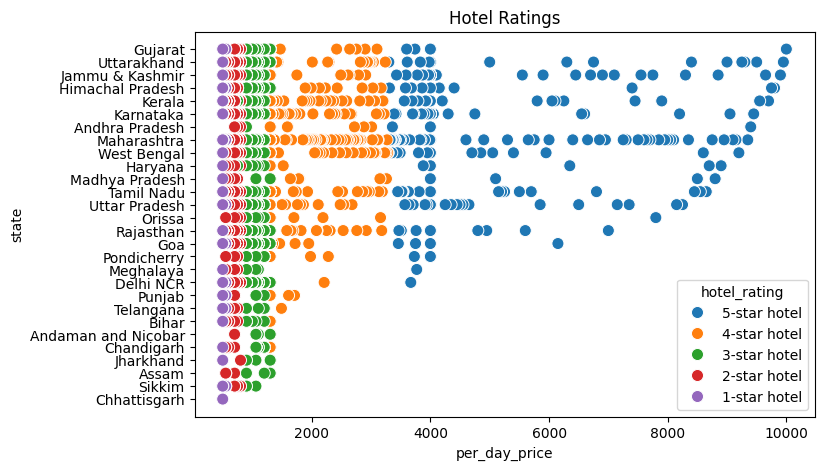

In [77]:
plt.figure(figsize=(8, 5))
plt.title('Hotel Ratings')
sns.scatterplot(x=df_pandas.per_day_price,
                y=df_pandas.state,
                hue=df_pandas.hotel_rating,
                s=75);

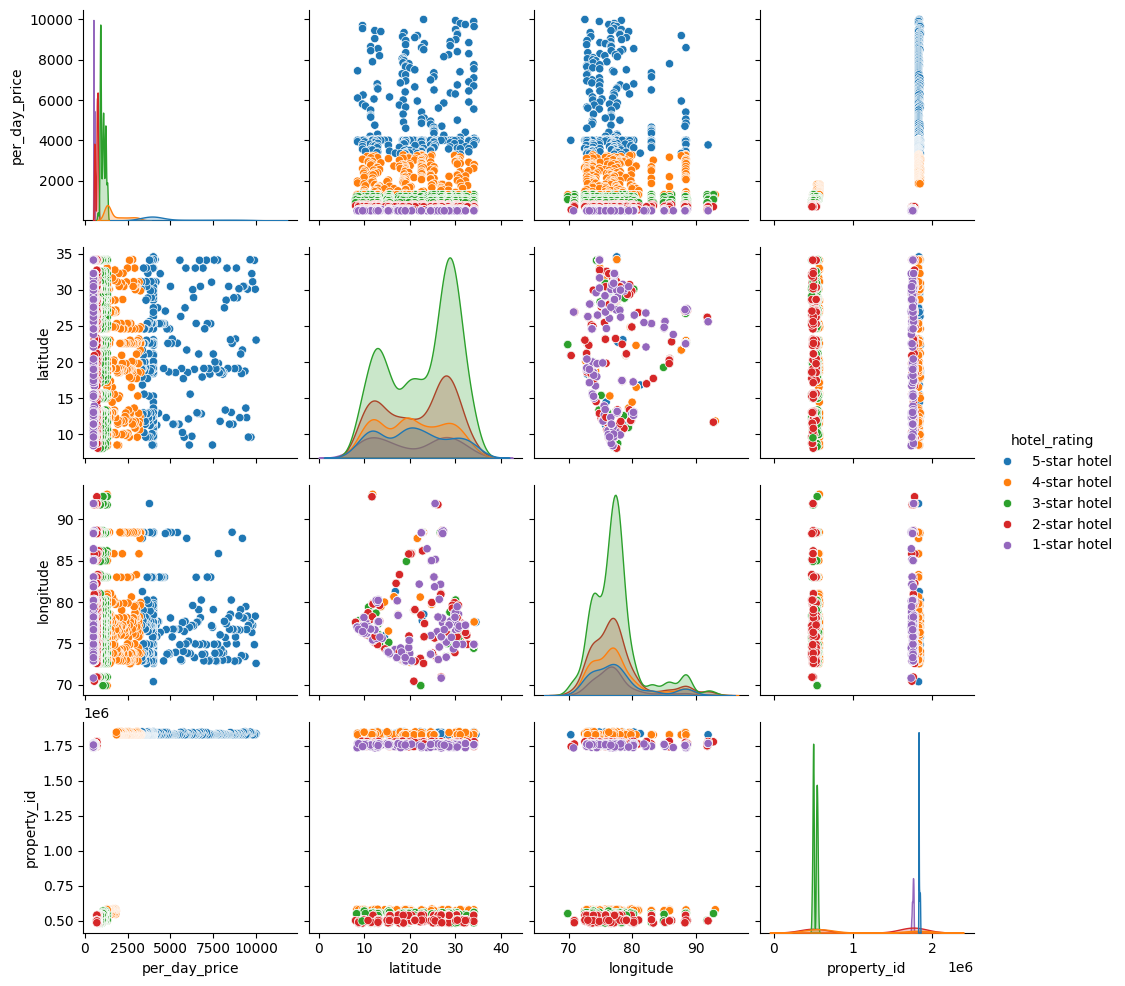

In [79]:
sns.pairplot(df_pandas, hue='hotel_rating');

**<h3>Conclusion</h3>**

The process of transforming and analyzing the hotel dataset, from loading it in PySpark to visualizing it using Matplotlib and Seaborn, allowed for a comprehensive understanding of the hotel landscape. The clean and structured data enabled meaningful analysis, and the visualizations provided actionable insights that could be used for decision-making in hotel management and customer satisfaction strategies.

**<h2> SQL Query </h2>**
Writing SQL Query to fetch data.

In [80]:
df_pyspark.createOrReplaceTempView("Hotels")

result_df = spark.sql("""
            SELECT * 
            FROM Hotels
            WHERE per_day_price == 9999
            """) ## <= WRITE YOUR SQL QUERY HERE.

result_df.show()

+--------------------+---------+-------+-------+------------+-------------+-----------+----------+--------------------+-----------+--------------------+--------------------+--------------------+
|             address|     city|  state|country|hotel_rating|per_day_price|   latitude| longitude|             pageurl|property_id|       property_name|           room_type|             uniq_id|
+--------------------+---------+-------+-------+------------+-------------+-----------+----------+--------------------+-----------+--------------------+--------------------+--------------------+
|Next to Havmor Re...|Ahmedabad|Gujarat|  India|5-star hotel|         9999|23.03747893|72.5663946|http://www.bookin...|    1837291|Treebo Super Inn ...|Standard Double Room|507fa25030cde0779...|
+--------------------+---------+-------+-------+------------+-------------+-----------+----------+--------------------+-----------+--------------------+--------------------+--------------------+

